# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("pastel")

In [25]:
accidents = pd.read_csv(r/'https://drive.google.com/file/d/1v5GpVkvmF6_Mi_awaaLYKoze5fDKs5uj/view?usp=sharing')
accidents.head()

NameError: ignored

In [21]:
lookup = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/DataCamp/data/road-safety-lookups.csv')
lookup

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known
5,Accident,accident_severity,1,Fatal,NaN
6,Accident,accident_severity,2,Serious,NaN
7,Accident,accident_severity,3,Slight,NaN
8,Accident,number_of_vehicles,NaN,NaN,NaN
9,Accident,number_of_casualties,NaN,NaN,NaN


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [ ]:
#Checking data

accidents.isna().sum()

accidents.dropna()

accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [ ]:
#Test data duplicate
duplicate = accidents['accident_index'].duplicated().any()
print(duplicate)

False


In [ ]:
#Check data meaning in "lookup"
lookup[lookup['field name'] =='weather_conditions']

,table,field name,code/format,label,note
86,Accident,weather_conditions,1,Fine no high winds,NaN
87,Accident,weather_conditions,2,Raining no high winds,NaN
88,Accident,weather_conditions,3,Snowing no high winds,NaN
89,Accident,weather_conditions,4,Fine + high winds,NaN
90,Accident,weather_conditions,5,Raining + high winds,NaN
91,Accident,weather_conditions,6,Snowing + high winds,NaN
92,Accident,weather_conditions,7,Fog or mist,NaN
93,Accident,weather_conditions,8,Other,NaN
94,Accident,weather_conditions,9,Unknown,NaN
95,Accident,weather_conditions,-1,Data missing or out of range,NaN


# Ninh

## EDA

In [ ]:
accidents.head()

,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,3,09:00,6,0,6,20,0,-1,6,0,9,9,1,9,9,0,0,1
1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,2,13:55,3,3036,6,20,9,2,6,0,0,4,1,1,1,0,0,1
2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,4,01:25,5,0,6,30,3,1,6,0,0,0,4,1,2,0,0,1
3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,4,01:50,3,11,6,30,0,-1,6,0,0,4,4,1,1,0,0,1
4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,4,02:25,3,40,6,30,3,4,5,0,0,0,4,1,1,0,0,1


In [ ]:
# Xem type va missing value
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

In [ ]:
accidents_2 = accidents.replace(-1, np.nan)
accidents_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

### 1. What time of day and day of the week do most major incidents happen?

In [ ]:
accidents_2['date'] = pd.to_datetime(accidents_2['date'])
accidents_2['time'] = pd.to_datetime(accidents_2['time'])

In [ ]:
accidents_2['hour'] = accidents_2['time'].dt.hour

In [ ]:
major_inc_bool = (accidents_2['accident_severity'] == 1) & (accidents_2['number_of_casualties']>=3)
major_accidents = accidents_2[major_inc_bool]

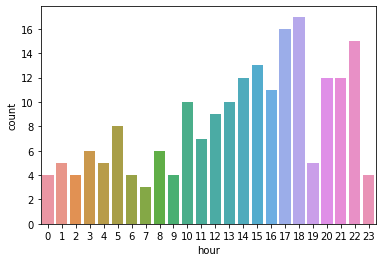

In [ ]:
sns.countplot(data=major_accidents,
            x='hour')

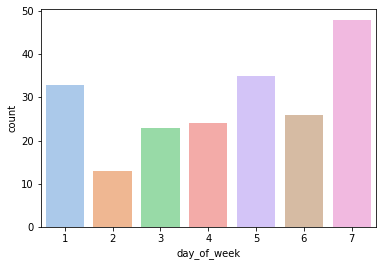

In [ ]:
sns.countplot(data=major_accidents,
            x='day_of_week')

In [ ]:
mjr_inc_groupby = major_accidents.groupby('day_of_week')['accident_index'].count()

temp = major_accidents.groupby(by=['hour','day_of_week'], as_index=False)['accident_index'].count()
mjr_inc_groupby = temp.rename(columns = {'accident_index':'major_acc_count'})
mjr_inc_groupby

,hour,day_of_week,major_acc_count
0,0,3,2
1,0,5,1
2,0,7,1
3,1,1,3
4,1,3,1
...,...,...,...
104,22,6,1
105,22,7,6
106,23,4,1
107,23,5,1


### 2. Are there any patterns in the time of day/ day of the week when major incidents occur?

- Time of day: phần lớn số tai nạn nghiêm trọng xảy ra trong khung giờ chiều & tối. Các khung giờ tập trung nhiều tai nạn:  14-15, 17-18, 20-22h
- Day of week: phần lớn số lượng tai nạn nghiêm trọng xảy ra trong các ngày chủ nhật, thứ năm và thứ bảy.

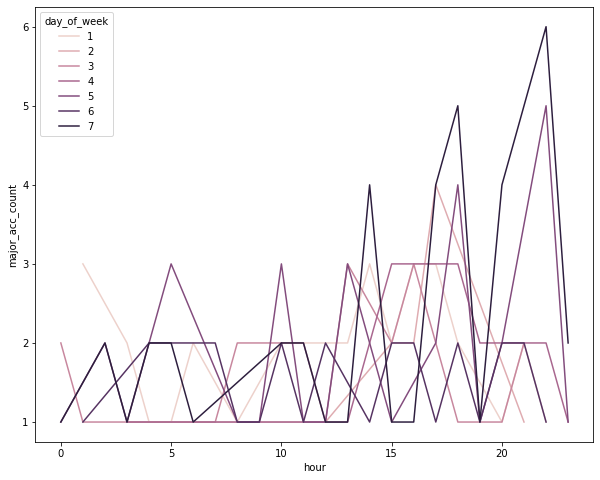

In [ ]:
plt.figure(figsize=(10,8))
g = sns.lineplot(x="hour", y='major_acc_count',
             data=mjr_inc_groupby,
             hue='day_of_week')

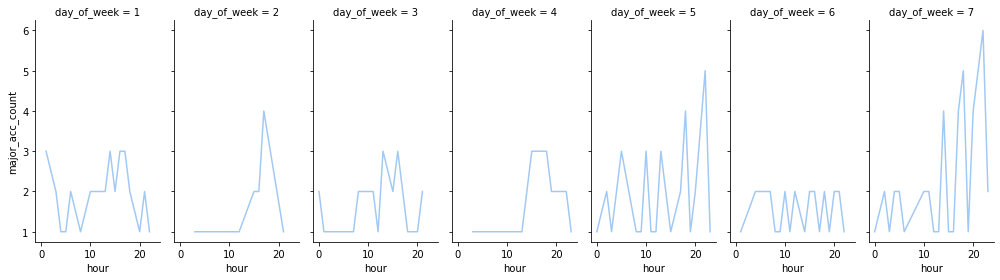

In [ ]:
g = sns.FacetGrid(mjr_inc_groupby, col="day_of_week", height=4, aspect=.5)
g.map(sns.lineplot, "hour", "major_acc_count")

In [ ]:
sns.relplot(
    data=mjr_inc_groupby, 
    x="Date", y="Close", hue="Stock", 
    height=5, aspect=2, 
    kind="line"
)

ValueError: ignored

Về cuối tuần, xu hướng tai nạn xảy ra trong khung giờ chiều tối càng rõ rệt, nhất là vào T7

### 3. What characteristics stand out in major incidents compared with other accidents?